# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

##Learning Objectives


At the end of the experiment, you will be able to:

* extract features from the images using PCA

* apply SVM on the extracted data and recognize the face

**NOTE:**  This experiment was seen earlier in the context of PCA. The intent  in this case, however, is to experiment with the SVM parameters and tune your classifier

##Dataset 

## Description

The dataset chosen for this experiment is Labeled Faces in the Wild dataset. The dataset is a collection of JPEG images of famous people collected over the internet. Each picture is centered on a single face. Each pixel of each channel in RGB is encoded by a float value ranging between 0.0 to 1.0.

To know more about the dataset you can refer below link :


http://vis-www.cs.umass.edu/lfw/

##Domain Information

As it is known by you that every face is different and a face has various features. Some of us have a broad forehead, some have narrow, some have fuller lips whereas some have thinner lips, etc. Additionally, every feature of the face has different variations. An ideal face recognition system should be able to consider all the variations and the challenges faced to recognize a face accurately.


###Below we have listed a few challenges


**Illumination:** Lighting aspect

**Background:** The placement of the subject also serves as a significant contributor to the limitations.

**Pose:** The movements of the head

**Occlusion:** beard, mustache, accessories (goggles, caps, mask, etc.) also meddle with the evaluation of a face recognition system. The presence of such components makes the subject diverse and hence it becomes difficult for the system to operate in a non-simulated environment. 

**Expressions:**  A change is an expression brings a change into all the aspects of the face.

All these make the probelm very complex.

##AI/ML Technique



### SVM

SVM stands for Support vector machines. It used for both classification and regression tasks. SVM works by searching the linear optimal separating hyperplane (decision boundary). The logic is that a decision boundary with a large margin is better when handling unseen data compared to the decision boundary with a small margin. When the data is not linearly separable, SVM transforms original data into a higher dimension using a nonlinear mapping to obtain the separating hyperplane.

To know more about SVM you can refer the below link :

https://www.quantstart.com/articles/Support-Vector-Machines-A-Guide-for-Beginners



## Keywords

* grid_search

* SVM

* cross_validation

* PCA

* Face recognization

* Kernels

#### Expected time to complete the experiment is: 65min

### Setup Steps

### Importing the required packages

In [0]:
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns; sns.set()


import warnings
warnings.simplefilter("ignore")

### Loading the dataset from sklearn datasets package

In [0]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [0]:
# Checking for the target names
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [0]:
# Checking for the shape of images
print(faces.images.shape)

(1348, 62, 47)


In [0]:
print(faces.images[0])

[[138.         135.66667    127.666664   ...  69.          68.333336
   67.333336  ]
 [146.         139.33333    125.         ...  68.333336    67.666664
   67.333336  ]
 [150.         138.33333    124.333336   ...  68.333336    67.666664
   66.666664  ]
 ...
 [153.         174.         110.666664   ...   1.6666666    0.6666667
    0.6666667 ]
 [122.         193.         167.33333    ...   1.3333334    1.6666666
    1.3333334 ]
 [ 88.         177.33333    206.         ...   1.6666666    1.6666666
    0.33333334]]


To get a sense of the data, let us visualize the faces

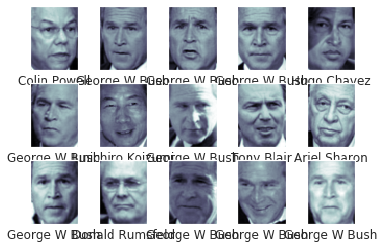

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone') 
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis to extract 150 fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [0]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

For testing our classifier output, we will split the data into a training and testing set:

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [0]:
Xtest.shape

(337, 2914)

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:

In [0]:

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 13s, sys: 17.1 s, total: 1min 30s
Wall time: 55.8 s
{'svc__C': 10, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum. 

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [0]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Let's take a look at a few of the test images along with their predicted values:

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

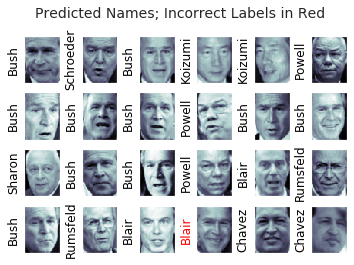

In [0]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s face in the bottom row was mislabeled as Blair). We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [0]:
print(classification_report(ytest, yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



We might also display the confusion matrix between these classes:

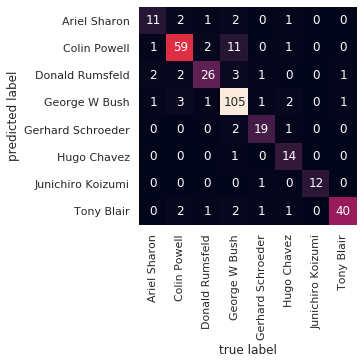

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

For a real-world facial recognition task, in which the photos do not come pre-cropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixelation.

#### Acknowledgment: Python Data Science Handbook by Jake VanderPlas